# Messi data exploration

Written report for this analysis can be found [here](../reports/messi_01_finding_leo.md)

In [87]:
import pandas as pd

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage

In [2]:
from src import utilities

In [3]:
df = utilities.get_master("events_shot")
df.shape

(12003, 22)

In [4]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,12003,NaN,NaN,NaN,6001,3465.11,0,3000.5,6001,9001.5,12002
season_id,12003,NaN,NaN,NaN,23.7796,13.6433,1,21,25,38,42
country_name,12003,1,Spain,12003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
competition_name,12003,1,La Liga,12003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season_name,12003,16,2017/2018,972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
match_id,12003,NaN,NaN,NaN,128067,104482,9575,69139,69292,266320,303731
match_date,12003,485,2018-10-20,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kick_off,12003,23,20:00:00.000,2194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,12003,NaN,NaN,NaN,23.7796,13.6433,1,21,25,38,42
event_type,12003,1,shot,12003,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
messi_fullname = "Lionel AndrÃ©s Messi Cuccittini"
messi_fullname

'Lionel AndrÃ©s Messi Cuccittini'

In [6]:
df["is_Messi"] = (df.player == messi_fullname)
df.is_Messi.value_counts()

False    9841
True     2162
Name: is_Messi, dtype: int64

In [30]:
df["shot"] = 1
df["goal"] = 0
df.loc[df.outcome == "Goal", "goal"] = 1

df.groupby("is_Messi")[["shot", "goal", "statsbomb_xg"]].describe(percentiles=[]).T.unstack([1])

is_Messi       False                                                True   \
               count      mean       std  min       50%       max   count   
shot          9841.0  1.000000  0.000000  1.0  1.000000  1.000000  2162.0   
goal          9841.0  0.122040  0.327349  0.0  0.000000  1.000000  2162.0   
statsbomb_xg  9841.0  0.117886  0.155145  0.0  0.054325  0.926928  2162.0   

is_Messi                                                        
                  mean       std       min       50%       max  
shot          1.000000  0.000000  1.000000  1.000000  1.000000  
goal          0.205365  0.404062  0.000000  0.000000  1.000000  
statsbomb_xg  0.157102  0.180756  0.010419  0.085053  0.921554

In [38]:
## shots, goals, xg, efficiency, skill
summary = df.groupby("is_Messi")[["shot", "goal", "statsbomb_xg"]].sum()
summary["shot_efficiency"] = summary.goal / summary.shot
summary["shot_skill"] = summary.goal / summary.statsbomb_xg
summary

,shot,goal,statsbomb_xg,shot_efficiency,shot_skill
is_Messi,,,,,
False,9841,1201,1160.119982,0.122040,1.035238
True,2162,444,339.654741,0.205365,1.307210


In [37]:
## volume
print("Messi take {0}% of all shots taken".format(100 * summary.iloc[1, 0] / summary.shot.sum()))

Messi take 18.012163625760227% of all shots taken


In [84]:
df["month"] = df.match_date.str.split("-", expand=True)[1]
df["month"].describe()

count     12003
unique       12
top          02
freq       1511
Name: month, dtype: object

In [96]:
df["minute_bin"] = df.minute.round(-1) #pd.cut(df.minute, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df["minute_bin"].describe()

count    12003.000000
mean        47.776389
std         26.506833
min          0.000000
25%         20.000000
50%         50.000000
75%         70.000000
max        100.000000
Name: minute_bin, dtype: float64

## Trends over time

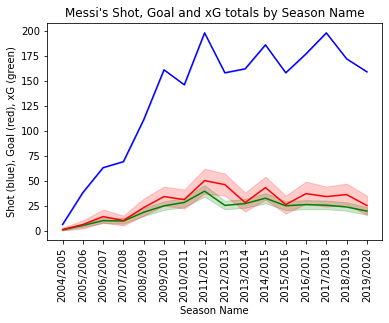

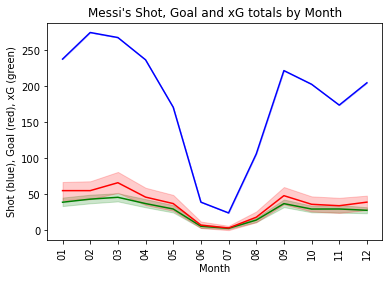

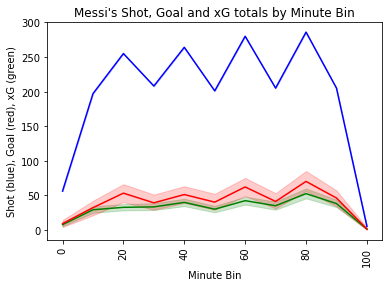

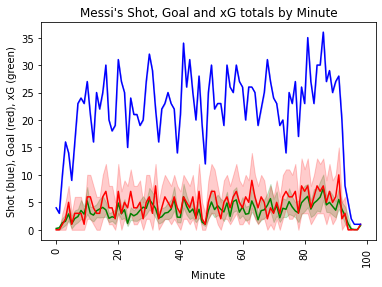

In [100]:
for x_col in ["season_name", "month", "minute_bin", "minute"]:
    x_disp = x_col.title().replace("_", " ")

    ax = sns.lineplot(data=df[df.is_Messi].sort_values(by=x_col), 
                      x=x_col, y="statsbomb_xg", estimator="sum", color="g")

    ax.set(xlabel=x_disp, ylabel='Shot (blue), Goal (red), xG (green)')
    plt.setp(ax.get_xticklabels(), rotation=90)

    sns.lineplot(data=df[df.is_Messi], x=x_col, y="goal", estimator="sum", color="r")

    sns.lineplot(data=df[df.is_Messi], x=x_col, y="shot", estimator="sum", color="b")

    plt.title("Messi's Shot, Goal and xG totals by {0}".format(x_disp))

    plt.show()

## Where shots are taken from

https://towardsdatascience.com/advanced-sports-visualization-with-pandas-matplotlib-and-seaborn-9c16df80a81b

In [101]:
def draw_pen_box(ax):
    # size of the pitch is 120, 80

    #Penalty Area
    plt.plot([57.8,57.8],[120,105.4],color="black")
    plt.plot([57.8,22.5],[105.4,105.4],color="black")
    plt.plot([22.5,22.5],[120, 105.4],color="black")

    #6-yard Box
    plt.plot([48,48],[120,115.1],color="black")
    plt.plot([48,32],[115.1,115.1],color="black")
    plt.plot([32,32],[120,115.1],color="black")

    #Penalty spot and the "D"
    topPenSpot = plt.Circle((40,110.3),0.71,color="black")
    ax.add_patch(topPenSpot)
    topDArc = Arc((40,110.3),height=16.2,width=16.2,angle=0,theta1=220,theta2=320,color="black")
    ax.add_patch(topDArc)
    
    #Goal line
    ax.axhline(y=120,color="black")

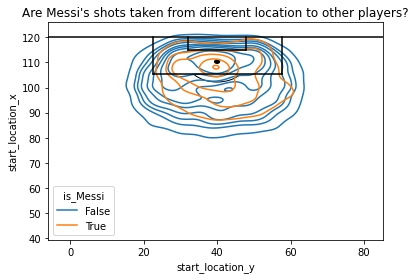

In [122]:
sns.kdeplot(
    data=df, x="start_location_y", y="start_location_x", hue="is_Messi", #fill=True,
)

ax = plt.gca()
draw_pen_box(ax)

plt.title("Are Messi's shots taken from different location to other players?")
plt.show()

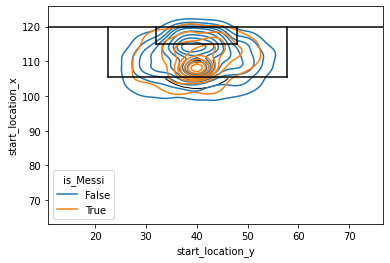

In [126]:
sns.kdeplot(
    data=df[df.goal == 1], x="start_location_y", y="start_location_x", hue="is_Messi", weights="statsbomb_xg"
)

ax = plt.gca()
draw_pen_box(ax)

# plt.title("Are Messi's shots taken from different location to other players?")
plt.show()

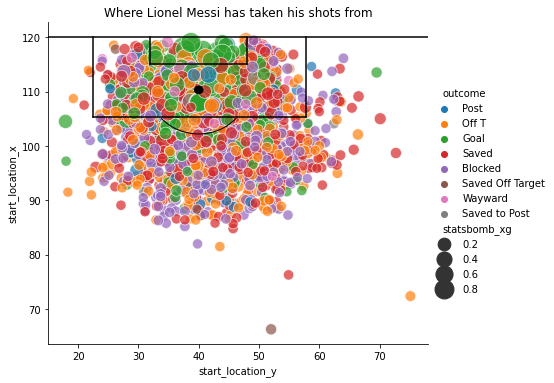

In [105]:
# fig = plt.figure()

# fig.set_size_inches(7, 5)
# ax=fig.add_subplot(1,1,1)
# g = sns.lmplot(x='start_location_x', y='start_location_y', size='statsbomb_xg', 
#            hue='team', data=shots, fit_reg=False, 
#            x_jitter=0.1, y_jitter=0.1, markers="o", palette="viridis") #, height=7)

g = sns.relplot(x='start_location_y', y='start_location_x', size='statsbomb_xg', hue="outcome",
            sizes=(100, 400), alpha=.7, aspect=1.2, height=5, 
                data=df[df.is_Messi])

ax = plt.gca()
draw_pen_box(ax)

plt.title("Where Lionel Messi has taken his shots from")
plt.show()

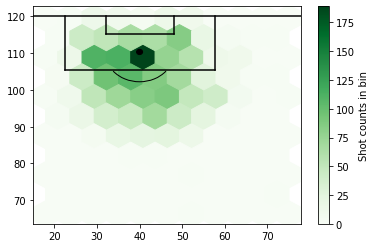

In [115]:
# plt.contour(shots.start_location_y, shots.start_location_x, shots.statsbomb_xg) - DOES NOT WORK
# plt.hist2d(shots.start_location_y, shots.start_location_x, bins=5, cmap="Blues")
plt.hexbin(df[df.is_Messi].start_location_y, df[df.is_Messi].start_location_x, gridsize=10, cmap="Greens")
cb = plt.colorbar()
cb.set_label("Shot counts in bin")

ax = plt.gca()
draw_pen_box(ax)

plt.show()

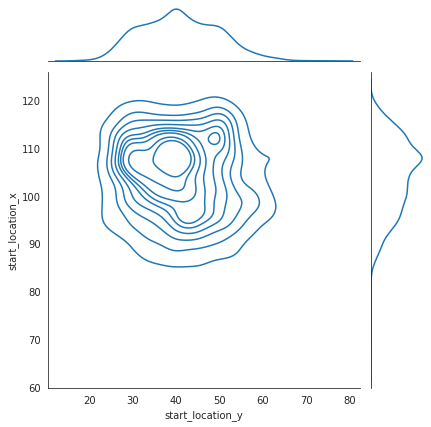

In [108]:
with sns.axes_style("white"):
    sns.jointplot(x="start_location_y", y="start_location_x", data=df[df.is_Messi], kind="kde");

## Where shots end up

In [109]:
def draw_posts(ax):
    
    ## 24ft x 8ft
    x1 = 36.
    x2 = 44.
    y1 = 0.
    y2 = (x2 - x1) * 8. / 24.
    
    x=[x1, x1, x2, x2]
    y=[y1, y2, y2, y1]
    
    plt.plot(x, y, color="black")
    ax.axhline(y=0,color="black")

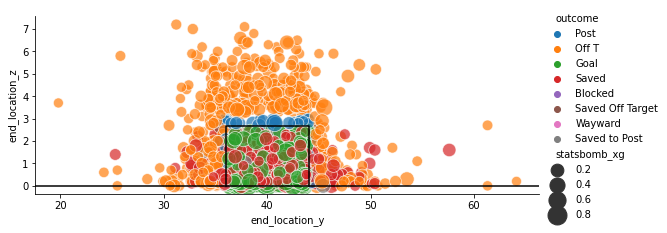

In [110]:
sns.relplot(x='end_location_y', y='end_location_z', size='statsbomb_xg', hue="outcome",
            sizes=(100, 400), alpha=.7, aspect=2.5, height=3, 
                data=df[df.is_Messi])

ax = plt.gca()
draw_posts(ax)
plt.show()

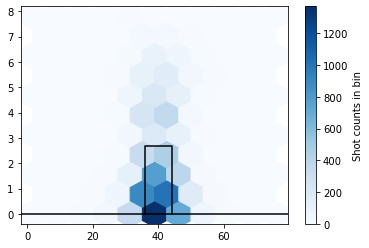

In [31]:
# plt.hist2d(shots.dropna(subset=["end_location_z"]).end_location_y, shots.dropna(subset=["end_location_z"]).end_location_z, bins=10, cmap="Blues")
plt.hexbin(df.dropna(subset=["end_location_z"]).end_location_y, df.dropna(subset=["end_location_z"]).end_location_z, 
           gridsize=10, cmap="Blues")
cb = plt.colorbar()
cb.set_label("Shot counts in bin")

ax = plt.gca()
draw_posts(ax)
plt.show()

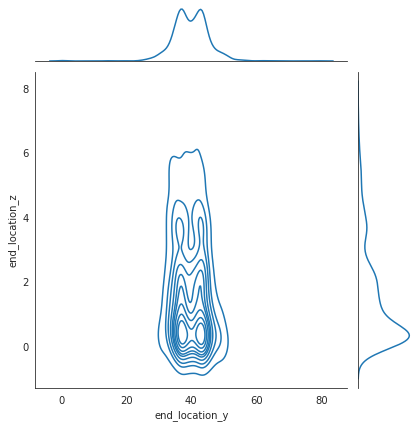

In [113]:
with sns.axes_style("white"):
    sns.jointplot(x="end_location_y", y="end_location_z", data=df[df.is_Messi], kind="kde");